In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from minisom import MiniSom

In [3]:
#Supress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data=pd.read_csv('Credit_Card_Applications.csv')

In [4]:
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [5]:
data.shape

(690, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [7]:
X=data.iloc[:,1:14].values
y=data.iloc[:,-1].values
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0
2,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0
3,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0
4,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0
687,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0
688,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0


In [18]:
#NORMALIZATION
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00
686,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00
687,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05
688,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00
686,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00
687,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05
688,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06


In [12]:
#Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5
#SOM DEFINITION
som = MiniSom(x = som_grid_rows,y = som_grid_columns, input_len = 13, sigma=sigma, learning_rate=learning_rate)

In [13]:
#SOM DEFINITION
som = MiniSom(x = som_grid_rows,y = som_grid_columns, input_len = 13, sigma=sigma, learning_rate=learning_rate)

In [14]:
#Weights initialization
som.random_weights_init(X)

#TRAINING
som.train_random(X,iterations)

In [19]:
#RETURN the distance map from weights
f=som.distance_map()
pd.DataFrame(f)

,0,1,2,3,4,5,6,7,8,9
0,0.210909,0.377969,0.424578,0.368730,0.306529,0.310602,0.400619,0.431455,0.439697,0.198918
1,0.286982,0.607278,0.544904,0.606027,0.565707,0.440297,0.574140,0.700859,0.533221,0.275688
2,0.424904,0.449531,0.677009,0.763979,0.606549,0.483457,0.576315,0.827409,0.882793,0.354183
3,0.301457,0.694648,0.642721,0.844714,0.631183,0.467921,0.685569,0.876280,0.751232,0.468925
4,0.358329,0.579084,0.803886,0.850484,0.709749,0.697428,0.592267,0.650935,0.778585,0.396621
5,0.340816,0.583724,0.715371,0.715416,0.803533,0.713576,0.643359,0.892049,0.737535,0.405244
6,0.462826,0.660003,0.575316,0.640918,0.728097,0.690792,0.790928,0.636360,0.717168,0.420207
7,0.532318,0.802137,0.572295,0.653001,0.739629,0.608781,0.538876,0.695558,0.564707,0.351430
8,0.508714,0.813805,0.596046,0.770615,1.000000,0.619566,0.614125,0.450514,0.441922,0.372970
9,0.267282,0.572645,0.422453,0.550137,0.537877,0.308353,0.396749,0.267250,0.252959,0.202219


In [16]:
pd.DataFrame(f)

,0,1,2,3,4,5,6,7,8,9
0,0.210909,0.377969,0.424578,0.368730,0.306529,0.310602,0.400619,0.431455,0.439697,0.198918
1,0.286982,0.607278,0.544904,0.606027,0.565707,0.440297,0.574140,0.700859,0.533221,0.275688
2,0.424904,0.449531,0.677009,0.763979,0.606549,0.483457,0.576315,0.827409,0.882793,0.354183
3,0.301457,0.694648,0.642721,0.844714,0.631183,0.467921,0.685569,0.876280,0.751232,0.468925
4,0.358329,0.579084,0.803886,0.850484,0.709749,0.697428,0.592267,0.650935,0.778585,0.396621
5,0.340816,0.583724,0.715371,0.715416,0.803533,0.713576,0.643359,0.892049,0.737535,0.405244
6,0.462826,0.660003,0.575316,0.640918,0.728097,0.690792,0.790928,0.636360,0.717168,0.420207
7,0.532318,0.802137,0.572295,0.653001,0.739629,0.608781,0.538876,0.695558,0.564707,0.351430
8,0.508714,0.813805,0.596046,0.770615,1.000000,0.619566,0.614125,0.450514,0.441922,0.372970
9,0.267282,0.572645,0.422453,0.550137,0.537877,0.308353,0.396749,0.267250,0.252959,0.202219


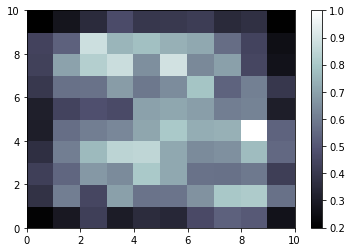

In [17]:

from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T)
colorbar()
show()

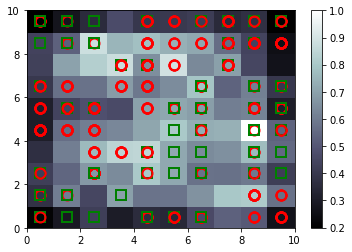

In [20]:
bone()
pcolor(som.distance_map().T)
colorbar()

markers=['o','s']
colors= ['r','g']
for i, x in enumerate(X):
  w= som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor=colors[y[i]],
       markerfacecolor='None',
       markersize=10,
       markeredgewidth=2)
show()


In [21]:
mapping = som.win_map(X)
mapping

defaultdict(list,
            {(9,
              8): [array([1.        , 0.12526316, 0.40928571, 0.5       , 0.23076923,
                     0.375     , 0.05561404, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.05      ]), array([1.        , 0.2793985 , 0.125     , 0.5       , 0.23076923,
                     0.375     , 0.01754386, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.116     ]), array([1.        , 0.44240602, 0.17857143, 0.5       , 0.15384615,
                     0.5       , 0.07894737, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.0705    ]), array([1.        , 0.14030075, 0.08928571, 0.5       , 0.        ,
                     0.        , 0.00298246, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.05      ]), array([1.        , 0.05263158, 0.10714286, 0.5       , 0.23076923,
                     0.375     , 0.00140351, 0.    

In [17]:
mapping

defaultdict(list,
            {(6,
              4): [array([1.        , 0.12526316, 0.40928571, 0.5       , 0.23076923,
                     0.375     , 0.05561404, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.05      ]), array([1.        , 0.67413534, 0.09678571, 0.5       , 0.53846154,
                     0.375     , 0.08473684, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.16      ]), array([1.        , 0.2793985 , 0.125     , 0.5       , 0.23076923,
                     0.375     , 0.01754386, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.116     ]), array([1.        , 0.44240602, 0.17857143, 0.5       , 0.15384615,
                     0.5       , 0.07894737, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.0705    ]), array([1.        , 0.30706767, 0.1875    , 0.5       , 0.61538462,
                     0.375     , 0.00298246, 0.    

In [28]:
mapping.keys()

dict_keys([(0, 2), (6, 7), (4, 6), (8, 2), (6, 0), (6, 2), (7, 8), (5, 2), (9, 7), (8, 3), (0, 9), (0, 6), (1, 2), (0, 7), (6, 3), (9, 9), (7, 4), (4, 3), (3, 9), (7, 9), (4, 4), (2, 6), (2, 0), (4, 0), (2, 4), (1, 8), (3, 8), (1, 3), (2, 8), (4, 1), (7, 6), (8, 8), (7, 3), (1, 1), (7, 0), (5, 7), (1, 4), (9, 4), (5, 8), (5, 3), (8, 0), (4, 5), (2, 5), (0, 4), (7, 5), (9, 0), (0, 1), (3, 1), (7, 1), (8, 5), (5, 9), (0, 0), (8, 7), (9, 8), (1, 5), (5, 1), (3, 4), (3, 3), (9, 2), (0, 8), (3, 0), (4, 8), (6, 6), (0, 3), (1, 9), (2, 9), (2, 2), (6, 4), (3, 7), (1, 7), (9, 5), (6, 9), (9, 3), (8, 9), (5, 0), (5, 5), (4, 9)])

In [29]:
len(mapping.keys())

77

In [31]:
mapping[(3,9)]

[array([1.        , 0.41849624, 0.0625    , 0.5       , 0.23076923,
        0.375     , 0.00736842, 1.        , 0.        , 0.        ,
        0.        , 0.5       , 0.08      ]),
 array([1.        , 0.40857143, 0.02982143, 0.5       , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.5       , 0.065     ]),
 array([1.        , 0.07022556, 0.37196429, 0.        , 0.38461538,
        0.375     , 0.00438596, 1.        , 0.        , 0.        ,
        0.        , 0.5       , 0.06      ]),
 array([1.        , 0.06511278, 0.19642857, 0.5       , 0.23076923,
        0.375     , 0.01754386, 1.        , 0.        , 0.        ,
        0.        , 0.5       , 0.04      ]),
 array([1.        , 0.26796992, 0.17857143, 0.        , 0.38461538,
        0.375     , 0.29824561, 1.        , 0.        , 0.        ,
        0.        , 0.5       , 0.        ]),
 array([1.        , 0.45864662, 0.39285714, 0.        , 0.07692308,
        0.375     , 0.

In [22]:
frauds = np.concatenate((mapping[(0,9)],mapping[(9,8)]),axis =0)
frauds

array([[1.        , 0.10406015, 0.04464286, 0.        , 0.53846154,
        0.875     , 0.04824561, 1.        , 1.        , 0.04477612,
        1.        , 0.5       , 0.07      ],
       [1.        , 0.29203008, 0.10857143, 0.        , 0.53846154,
        0.875     , 0.07157895, 1.        , 1.        , 0.01492537,
        1.        , 0.5       , 0.09      ],
       [1.        , 0.21804511, 0.18      , 0.        , 0.53846154,
        0.5       , 0.05263158, 1.        , 1.        , 0.11940299,
        1.        , 0.5       , 0.072     ],
       [1.        , 0.21172932, 0.14285714, 0.        , 0.15384615,
        0.875     , 0.20175439, 1.        , 1.        , 0.02985075,
        1.        , 0.5       , 0.0375    ],
       [1.        , 0.30571429, 0.00285714, 0.        , 0.46153846,
        0.5       , 0.00140351, 1.        , 1.        , 0.01492537,
        1.        , 0.5       , 0.14      ],
       [1.        , 0.10902256, 0.10714286, 0.        , 0.07692308,
        0.375     , 0.03807

In [33]:
frauds

array([[1.        , 0.29699248, 0.0625    , 0.5       , 1.        ,
        0.875     , 0.15789474, 1.        , 1.        , 0.05970149,
        1.        , 0.5       , 0.1265    ],
       [1.        , 0.41609023, 0.17857143, 0.5       , 0.76923077,
        0.875     , 0.1754386 , 1.        , 1.        , 0.08955224,
        1.        , 0.5       , 0.235     ],
       [1.        , 0.31834586, 0.17857143, 0.5       , 1.        ,
        0.875     , 0.26315789, 1.        , 1.        , 0.08955224,
        1.        , 0.5       , 0.        ],
       [1.        , 0.28571429, 0.05357143, 0.5       , 0.92307692,
        0.875     , 0.19298246, 1.        , 1.        , 0.04477612,
        1.        , 0.5       , 0.        ],
       [1.        , 0.19924812, 0.02678571, 0.5       , 0.53846154,
        0.875     , 0.14912281, 1.        , 1.        , 0.04477612,
        1.        , 0.5       , 0.156     ],
       [1.        , 0.14030075, 0.41071429, 0.5       , 0.61538462,
        0.875     , 0.07456

In [34]:
frauds.shape

(27, 13)

In [23]:
frauds1 = sc.inverse_transform(frauds)
pd.DataFrame(frauds1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.104060,0.044643,0.0,0.538462,0.875,0.048246,1.0,1.0,0.044776,1.0,0.5,0.0700
1,1.0,0.292030,0.108571,0.0,0.538462,0.875,0.071579,1.0,1.0,0.014925,1.0,0.5,0.0900
2,1.0,0.218045,0.180000,0.0,0.538462,0.500,0.052632,1.0,1.0,0.119403,1.0,0.5,0.0720
3,1.0,0.211729,0.142857,0.0,0.153846,0.875,0.201754,1.0,1.0,0.029851,1.0,0.5,0.0375
4,1.0,0.305714,0.002857,0.0,0.461538,0.500,0.001404,1.0,1.0,0.014925,1.0,0.5,0.1400
5,1.0,0.109023,0.107143,0.0,0.076923,0.375,0.038070,1.0,1.0,0.119403,1.0,0.5,0.0800
6,1.0,0.441053,0.013393,0.0,0.538462,0.375,0.013158,1.0,1.0,0.119403,1.0,0.5,0.1500
7,1.0,0.312030,0.144286,0.0,0.153846,0.500,0.298246,1.0,1.0,0.104478,1.0,0.5,0.0975
8,1.0,0.109023,0.171071,0.0,0.615385,0.375,0.078947,1.0,1.0,0.014925,1.0,0.5,0.0400
9,1.0,0.344662,0.157679,0.0,0.230769,0.375,0.008772,1.0,1.0,0.149254,1.0,0.5,0.1600


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,33.50,1.750,2.0,14.0,8.0,4.500,1.0,1.0,4.0,1.0,2.0,253.0
1,1.0,41.42,5.000,2.0,11.0,8.0,5.000,1.0,1.0,6.0,1.0,2.0,470.0
2,1.0,34.92,5.000,2.0,14.0,8.0,7.500,1.0,1.0,6.0,1.0,2.0,0.0
3,1.0,32.75,1.500,2.0,13.0,8.0,5.500,1.0,1.0,3.0,1.0,2.0,0.0
4,1.0,27.00,0.750,2.0,8.0,8.0,4.250,1.0,1.0,3.0,1.0,2.0,312.0
5,1.0,23.08,11.500,2.0,9.0,8.0,2.125,1.0,1.0,11.0,1.0,2.0,290.0
6,1.0,27.25,1.585,2.0,13.0,8.0,1.835,1.0,1.0,12.0,1.0,2.0,583.0
7,1.0,34.75,15.000,2.0,12.0,7.0,5.375,1.0,1.0,9.0,1.0,2.0,0.0
8,1.0,39.33,5.875,2.0,13.0,8.0,10.000,1.0,1.0,14.0,1.0,2.0,399.0
9,1.0,32.67,5.500,2.0,11.0,8.0,5.500,1.0,1.0,12.0,1.0,2.0,408.0


In [18]:
df = pd.read_csv('data.csv')

In [23]:
x = df.iloc[:,0]
y = df.iloc[:,1]

In [25]:
x.head()

0    53.426804
1    61.530358
2    47.475640
3    59.813208
4    55.142188
Name: 32.502345269453031, dtype: float64